In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from functools import wraps
import time

In [2]:
def timeit(func):
    @wraps(func)
    def timeit_wrapper(*args, **kwargs):
        start_time = time.perf_counter()
        result = func(*args, **kwargs)
        end_time = time.perf_counter()
        total_time = end_time - start_time
        print(f'Function {func.__name__} took {total_time:.4f} seconds')
        return result
    return timeit_wrapper

@timeit
def load_data():
    data = pd.read_csv('BookingDump.csv', header=None)
    data.columns = ['BookingCode', 'ProductType', 'WindowType',
                 'SoonestPickup', 'LatestPickup', 'SoonestDropoff',
                 'LatestDropoff', 'PickupLatitude', 'PickupLongitude',
                 'PickupAdress', 'PickupCity', 'DropoffLatitude',
                 'DropoffLongitude', 'DropoffAdress', 'DropoffCity']
    data['SoonestPickup'] = pd.to_datetime(data['SoonestPickup'])
    data['LatestPickup'] = pd.to_datetime(data['LatestPickup'])
    data['SoonestDropoff'] = pd.to_datetime(data['SoonestDropoff'])
    data['LatestDropoff'] = pd.to_datetime(data['LatestDropoff'])
    return data

In [3]:
data = load_data()

Function load_data took 8.5414 seconds


In [4]:
# The data as it was provided by goopti
data

BookingCode ProductType      WindowType  \
0        TKT-16.08.2013-45835-10668        OPTI  SOONEST_PICKUP   
1          TKT-23.08.2013-46651-213        OPTI  LATEST_DROPOFF   
2          TKT-23.08.2013-46651-213        OPTI  SOONEST_PICKUP   
3         TKT-24.09.2013-50819-3601        OPTI  LATEST_DROPOFF   
4         TKT-24.09.2013-50819-3601        OPTI  SOONEST_PICKUP   
...                             ...         ...             ...   
1002193                    4XS9E2SP         FIX  SOONEST_PICKUP   
1002194                    FJ32GE7G        OPTI  LATEST_DROPOFF   
1002195                    FJ32GE7G        OPTI  SOONEST_PICKUP   
1002196                    QX4LMUVB        OPTI  LATEST_DROPOFF   
1002197                    QX4LMUVB        OPTI  SOONEST_PICKUP   

              SoonestPickup        LatestPickup      SoonestDropoff  \
0       2014-05-02 11:30:00 2014-05-02 14:30:00 2014-05-02 14:00:00   
1       2014-08-01 06:45:00 2014-08-01 09:45:00 2014-08-01 09:45:00   
2       2014-08-08 12:45:00 2014-08-08 15:45:00 2014-08-08 15:45:00   
3       2014-07-11 18:30:00 2014-07-11 22:30:00 2014-07-12 00:30:00   
4       2014-08-02 21:15:00 2014-08-03 01:15:00 2014-08-03 03:15:00   
...                     ...                 ...                 ...   
1002193 2023-04-28 21:00:00 2023-04-28 21:00:00 2023-04-29 03:00:00   
1002194 2023-04-20 21:15:00 2023-04-20 22:15:00 2023-04-21 00:45:00   
1002195 2023-04-24 12:00:00 2023-04-24 13:00:00 2023-04-24 15:30:00   
1002196 2023-03-30 11:15:00 2023-03-30 12:00:00 2023-03-30 12:00:00   
1002197 2023-04-01 20:30:00 2023-04-01 21:15:00 2023-04-01 21:15:00   

              LatestDropoff  PickupLatitude  PickupLongitude  \
0       2014-05-02 17:00:00         45.8208         13.48520   
1       2014-08-01 12:45:00         46.0577         14.51180   
2       2014-08-08 18:45:00         45.5054         12.33930   
3       2014-07-12 04:30:00         46.0577         14.51180   
4       2014-08-03 07:15:00         48.3574         11.78410   
...                     ...             ...              ...   
1002193 2023-04-29 03:00:00         45.6294          8.71115   
1002194 2023-04-21 01:45:00         46.5417         15.68590   
1002195 2023-04-24 16:30:00         48.1198         16.56430   
1002196 2023-03-30 12:45:00         46.0344         14.45460   
1002197 2023-04-01 22:00:00         46.2313         14.45500   

                                              PickupAdress  \
0                                                      NaN   
1                                                      NaN   
2                                                      NaN   
3                                                      NaN   
4                                                      NaN   
...                                                    ...   
1002193  Letališče Milano Malpensa T1, 21010 Ferno Vare...   
1002194        Zagernikova ulica 2, 2000 Maribor, Slovenia   
1002195  Letališče Dunaj (VIE), Schwechat, 1300, (Odhod...   
1002196       Tržaška cesta 202, 1000 Ljubljana, Slovenija   
1002197  Letališče Ljubljana (LJU), Zgornji Brnik 130a,...   

                   PickupCity  DropoffLatitude  DropoffLongitude  \
0        Ronchi dei Legionari          46.5592           15.6551   
1                   Ljubljana          45.5054           12.3393   
2                     Venezia          46.0577           14.5118   
3                   Ljubljana          48.3574           11.7841   
4           München-Flughafen          46.0577           14.5118   
...                       ...              ...               ...   
1002193                Milano          45.7734           14.2114   
1002194               Maribor          48.1198           16.5643   
1002195                 Dunaj          46.5417           15.6859   
1002196             Ljubljana          46.2313           14.4550   
1002197             Ljubljana          46.0344           14.4546   

                                   

In [5]:
@timeit
def average_pickup(df):
    # Create column AveragePickup that is time between LatestPickup and SoonestPickup
    df['AveragePickup'] = df['SoonestPickup'] + (df['LatestPickup'] - df['SoonestPickup']) / 2
    return df

data = average_pickup(data)
data

Function average_pickup took 0.0238 seconds


BookingCode ProductType      WindowType  \
0        TKT-16.08.2013-45835-10668        OPTI  SOONEST_PICKUP   
1          TKT-23.08.2013-46651-213        OPTI  LATEST_DROPOFF   
2          TKT-23.08.2013-46651-213        OPTI  SOONEST_PICKUP   
3         TKT-24.09.2013-50819-3601        OPTI  LATEST_DROPOFF   
4         TKT-24.09.2013-50819-3601        OPTI  SOONEST_PICKUP   
...                             ...         ...             ...   
1002193                    4XS9E2SP         FIX  SOONEST_PICKUP   
1002194                    FJ32GE7G        OPTI  LATEST_DROPOFF   
1002195                    FJ32GE7G        OPTI  SOONEST_PICKUP   
1002196                    QX4LMUVB        OPTI  LATEST_DROPOFF   
1002197                    QX4LMUVB        OPTI  SOONEST_PICKUP   

              SoonestPickup        LatestPickup      SoonestDropoff  \
0       2014-05-02 11:30:00 2014-05-02 14:30:00 2014-05-02 14:00:00   
1       2014-08-01 06:45:00 2014-08-01 09:45:00 2014-08-01 09:45:00   
2       2014-08-08 12:45:00 2014-08-08 15:45:00 2014-08-08 15:45:00   
3       2014-07-11 18:30:00 2014-07-11 22:30:00 2014-07-12 00:30:00   
4       2014-08-02 21:15:00 2014-08-03 01:15:00 2014-08-03 03:15:00   
...                     ...                 ...                 ...   
1002193 2023-04-28 21:00:00 2023-04-28 21:00:00 2023-04-29 03:00:00   
1002194 2023-04-20 21:15:00 2023-04-20 22:15:00 2023-04-21 00:45:00   
1002195 2023-04-24 12:00:00 2023-04-24 13:00:00 2023-04-24 15:30:00   
1002196 2023-03-30 11:15:00 2023-03-30 12:00:00 2023-03-30 12:00:00   
1002197 2023-04-01 20:30:00 2023-04-01 21:15:00 2023-04-01 21:15:00   

              LatestDropoff  PickupLatitude  PickupLongitude  \
0       2014-05-02 17:00:00         45.8208         13.48520   
1       2014-08-01 12:45:00         46.0577         14.51180   
2       2014-08-08 18:45:00         45.5054         12.33930   
3       2014-07-12 04:30:00         46.0577         14.51180   
4       2014-08-03 07:15:00         48.3574         11.78410   
...                     ...             ...              ...   
1002193 2023-04-29 03:00:00         45.6294          8.71115   
1002194 2023-04-21 01:45:00         46.5417         15.68590   
1002195 2023-04-24 16:30:00         48.1198         16.56430   
1002196 2023-03-30 12:45:00         46.0344         14.45460   
1002197 2023-04-01 22:00:00         46.2313         14.45500   

                                              PickupAdress  \
0                                                      NaN   
1                                                      NaN   
2                                                      NaN   
3                                                      NaN   
4                                                      NaN   
...                                                    ...   
1002193  Letališče Milano Malpensa T1, 21010 Ferno Vare...   
1002194        Zagernikova ulica 2, 2000 Maribor, Slovenia   
1002195  Letališče Dunaj (VIE), Schwechat, 1300, (Odhod...   
1002196       Tržaška cesta 202, 1000 Ljubljana, Slovenija   
1002197  Letališče Ljubljana (LJU), Zgornji Brnik 130a,...   

                   PickupCity  DropoffLatitude  DropoffLongitude  \
0        Ronchi dei Legionari          46.5592           15.6551   
1                   Ljubljana          45.5054           12.3393   
2                     Venezia          46.0577           14.5118   
3                   Ljubljana          48.3574           11.7841   
4           München-Flughafen          46.0577           14.5118   
...                       ...              ...               ...   
1002193                Milano          45.7734           14.2114   
1002194               Maribor          48.1198           16.5643   
1002195                 Dunaj          46.5417           15.6859   
1002196             Ljubljana          46.2313           14.4550   
1002197             Ljubljana          46.0344           14.4546   

                                   

In [6]:
@timeit
def point2point_aggregate(all_data):
    # Aggregate data so it contains counts of passengers between pair of locations aggregated into 3 hour buckets
    df = pd.DataFrame()
    df['PickupCity'] = all_data['PickupCity']
    df['DropoffCity'] = all_data['DropoffCity']
    df['Count'] = 1
    df['AveragePickupRound'] = all_data['AveragePickup'].apply(lambda x: x.floor('3H') + pd.Timedelta(hours=3))
    return df.groupby(['PickupCity', 'DropoffCity', 'AveragePickupRound']).count().reset_index().sort_values('AveragePickupRound')

@timeit
def ignore_data_after_2023(df):
    # Drop data after 2023
    return df.query('AveragePickupRound <= 2023')

In [7]:
point2point = point2point_aggregate(data)
point2point

Function point2point_aggregate took 230.1279 seconds


PickupCity           DropoffCity  AveragePickupRound  Count
234055  Ljubljana  Ronchi dei Legionari 2014-04-30 12:00:00      1
321716    Maribor             Schwechat 2014-04-30 12:00:00      1
288775  Ljubljana         Zgornji Brnik 2014-04-30 12:00:00      2
405266   Portorož         Zgornji Brnik 2014-04-30 12:00:00      1
259258  Ljubljana               Venezia 2014-04-30 12:00:00      1
...           ...                   ...                 ...    ...
636846     Zagreb             Ljubljana 2024-01-19 15:00:00      1
105078      Dunaj             Ljubljana 2024-01-21 12:00:00      1
98938       Dunaj                 Celje 2024-01-26 21:00:00      1
587808     Venice                 Udine 2024-01-31 12:00:00      1
638630     Zagreb               Maribor 2024-02-15 09:00:00      1

[651892 rows x 4 columns]

In [8]:
point2point = ignore_data_after_2023(point2point)
point2point

Function ignore_data_after_2023 took 0.0566 seconds


PickupCity           DropoffCity  AveragePickupRound  Count
234055  Ljubljana  Ronchi dei Legionari 2014-04-30 12:00:00      1
321716    Maribor             Schwechat 2014-04-30 12:00:00      1
288775  Ljubljana         Zgornji Brnik 2014-04-30 12:00:00      2
405266   Portorož         Zgornji Brnik 2014-04-30 12:00:00      1
259258  Ljubljana               Venezia 2014-04-30 12:00:00      1
...           ...                   ...                 ...    ...
452915    Treviso                Padova 2023-01-01 00:00:00      1
447572    Treviso             Ljubljana 2023-01-01 00:00:00      1
326212    Maribor                Vienna 2023-01-01 00:00:00      1
453176    Treviso                 Padua 2023-01-01 00:00:00      1
450293    Treviso            Monfalcone 2023-01-01 00:00:00      1

[631791 rows x 4 columns]

In [9]:
@timeit
def keep_only_only_a_few_pairs_of_cities(df):
    # Select a subset of cities just for testing phase
    return df.query('(PickupCity=="Ljubljana" and DropoffCity=="Benetke") or (PickupCity=="Ljubljana" and DropoffCity=="Dunaj") or (PickupCity=="Benetke" and DropoffCity=="Ljubljana")')

In [10]:
point2point = keep_only_only_a_few_pairs_of_cities(point2point).sort_values('Count')
point2point

Function keep_only_only_a_few_pairs_of_cities took 0.1725 seconds


PickupCity DropoffCity  AveragePickupRound  Count
151458  Ljubljana     Benetke 2014-05-14 06:00:00      1
19917     Benetke   Ljubljana 2018-08-28 03:00:00      1
19914     Benetke   Ljubljana 2018-08-27 18:00:00      1
181798  Ljubljana       Dunaj 2018-08-27 18:00:00      1
19913     Benetke   Ljubljana 2018-08-27 15:00:00      1
...           ...         ...                 ...    ...
15427     Benetke   Ljubljana 2016-05-02 15:00:00     24
14246     Benetke   Ljubljana 2015-09-30 15:00:00     25
13368     Benetke   Ljubljana 2015-05-02 15:00:00     27
15430     Benetke   Ljubljana 2016-05-03 00:00:00     28
153378  Ljubljana     Benetke 2015-04-25 06:00:00     30

[34172 rows x 4 columns]

In [11]:
@timeit
def fill_missing_with_0(df):
    # Fill in missing data with 0s. This means if no orders were placed between Ljubljana -> Dunaj at 2019-11-06 09:00:00 and that row is missing form the df dataframe, a new row will be created that contains for that route at the time. 
    # It fills out the info that can be infered from data. No entry for specific pair of cities at specific time means 0 reservations were made
    all_dataframes = [df]
    interval = pd.DateOffset(hours=3)
    date_range = pd.date_range(start=df.AveragePickupRound.min(), end=df.AveragePickupRound.max(), freq=interval)
    for pc in df['PickupCity'].unique():
        for dc in df['DropoffCity'].unique():
            if len(df.query(f'(PickupCity=="{pc}" and DropoffCity=="{dc}")'))>0:
                new_df = pd.DataFrame()
                new_df['AveragePickupRound'] = date_range
                new_df['PickupCity'] = pc
                new_df['DropoffCity'] = dc
                new_df['Count'] = 0
                all_dataframes.append(new_df)
    return pd.concat(all_dataframes).groupby(['PickupCity', 'DropoffCity', 'AveragePickupRound']).max().reset_index().sort_values('AveragePickupRound')

In [12]:
# as you can se now, the dataframe also contains 0s
point2point = fill_missing_with_0(point2point)
point2point.sort_values('Count')

Function fill_missing_with_0 took 1.0259 seconds


PickupCity DropoffCity  AveragePickupRound  Count
0        Benetke   Ljubljana 2014-05-14 06:00:00      0
66474  Ljubljana       Dunaj 2019-11-06 06:00:00      0
16016    Benetke   Ljubljana 2019-11-06 06:00:00      0
16017    Benetke   Ljubljana 2019-11-06 09:00:00      0
66475  Ljubljana       Dunaj 2019-11-06 09:00:00      0
...          ...         ...                 ...    ...
5755     Benetke   Ljubljana 2016-05-02 15:00:00     24
4035     Benetke   Ljubljana 2015-09-30 15:00:00     25
2827     Benetke   Ljubljana 2015-05-02 15:00:00     27
5758     Benetke   Ljubljana 2016-05-03 00:00:00     28
27997  Ljubljana     Benetke 2015-04-25 06:00:00     30

[75687 rows x 4 columns]

In [13]:
@timeit
def train_test_split(df):
    # split the data in train/test
    # Ignore corona data
    train = df.query('AveragePickupRound <= 2019')
    test = df.query('AveragePickupRound > 2022')
    return train, test

Function train_test_split took 0.0093 seconds


(array([17332., 17339., 17348., 17355., 17362.]),
 [Text(17332.0, 0, '2017-06-15'),
  Text(17339.0, 0, '2017-06-22'),
  Text(17348.0, 0, '2017-07-01'),
  Text(17355.0, 0, '2017-07-08'),
  Text(17362.0, 0, '2017-07-15')])

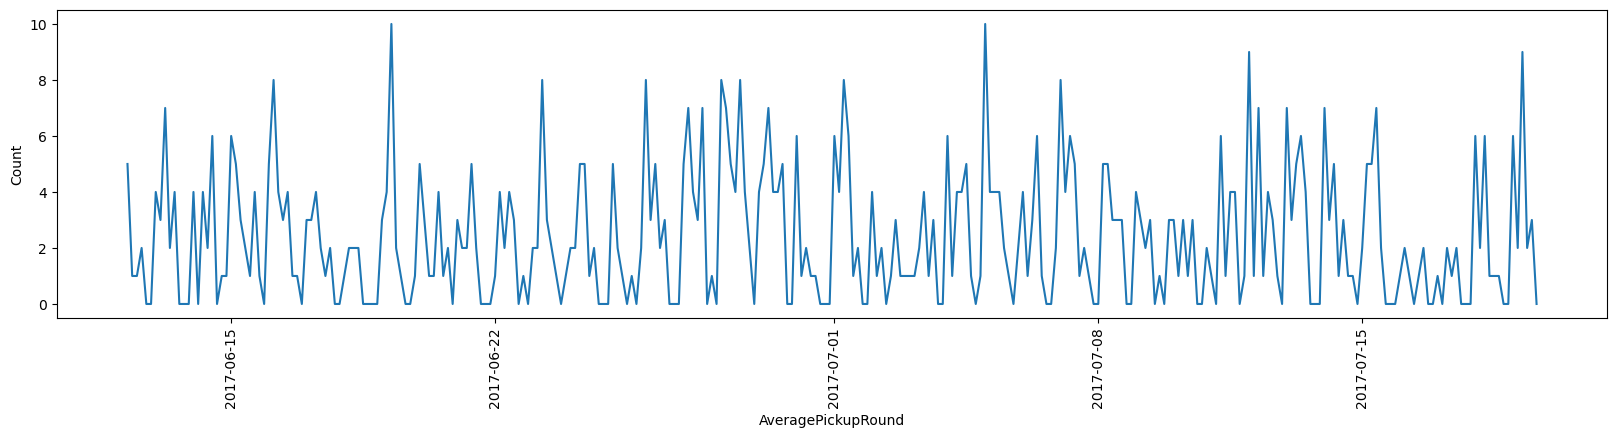

In [14]:
point2point_train, point2point_test = train_test_split(point2point)

# Plot a small subset of demand for Ljubljana -> Benetke in train data
import seaborn as sns
plt.figure(figsize=(20,4))
sns.lineplot(data=point2point_train.query('(PickupCity=="Ljubljana" and DropoffCity=="Benetke")')[9000:9300], x="AveragePickupRound", y="Count")
plt.xticks(rotation=90)

In [15]:
# Show train data
point2point_train

PickupCity DropoffCity  AveragePickupRound  Count
0        Benetke   Ljubljana 2014-05-14 06:00:00      0
50458  Ljubljana       Dunaj 2014-05-14 06:00:00      0
25229  Ljubljana     Benetke 2014-05-14 06:00:00      1
1        Benetke   Ljubljana 2014-05-14 09:00:00      0
50459  Ljubljana       Dunaj 2014-05-14 09:00:00      0
...          ...         ...                 ...    ...
13541    Benetke   Ljubljana 2018-12-31 21:00:00      0
63999  Ljubljana       Dunaj 2018-12-31 21:00:00      1
13542    Benetke   Ljubljana 2019-01-01 00:00:00      2
64000  Ljubljana       Dunaj 2019-01-01 00:00:00      0
38771  Ljubljana     Benetke 2019-01-01 00:00:00      0

[40629 rows x 4 columns]

In [16]:
# Show test data
point2point_test

PickupCity DropoffCity  AveragePickupRound  Count
72769  Ljubljana       Dunaj 2022-01-01 03:00:00      0
47540  Ljubljana     Benetke 2022-01-01 03:00:00      0
22311    Benetke   Ljubljana 2022-01-01 03:00:00      0
47541  Ljubljana     Benetke 2022-01-01 06:00:00      0
22312    Benetke   Ljubljana 2022-01-01 06:00:00      0
...          ...         ...                 ...    ...
25227    Benetke   Ljubljana 2022-12-31 15:00:00      0
50456  Ljubljana     Benetke 2022-12-31 15:00:00      0
50457  Ljubljana     Benetke 2022-12-31 18:00:00      0
25228    Benetke   Ljubljana 2022-12-31 18:00:00      1
75686  Ljubljana       Dunaj 2022-12-31 18:00:00      0

[8754 rows x 4 columns]

In [17]:
# construct a bunch of baseline models
# most of them look identical

class BaselineMeanTimeOfDay:
    def __init__(self, train_data):
        self.train_data = train_data
        self.train_data['hour'] = self.train_data['AveragePickupRound'].dt.hour
        self.train_data = self.train_data.groupby(['PickupCity', 'DropoffCity', 'hour']).mean(numeric_only=True).reset_index()
        
    def query(self, pickup_city, dropoff_city, time):
        return self.train_data.query(f'PickupCity=="{pickup_city}" and DropoffCity=="{dropoff_city}" and hour=={time.hour}').iloc[0]['Count']
    
    def query_multiple(self, pickup_citys, dropoff_citys, times):
        return_list = []
        for pickup_city, dropoff_city, time in zip(pickup_citys, dropoff_citys, times):
            return_list.append(self.query(pickup_city, dropoff_city, time))
        return return_list
    
class BaselineMean:
    def __init__(self, train_data):
        self.train_data = train_data
        self.train_data = self.train_data.groupby(['PickupCity', 'DropoffCity']).mean(numeric_only=True).reset_index()
        
    def query(self, pickup_city, dropoff_city, time):
        return self.train_data.query(f'PickupCity=="{pickup_city}" and DropoffCity=="{dropoff_city}"').iloc[0]['Count']
    
    def query_multiple(self, pickup_citys, dropoff_citys, times):
        return_list = []
        for pickup_city, dropoff_city, time in zip(pickup_citys, dropoff_citys, times):
            return_list.append(self.query(pickup_city, dropoff_city, time))
        return return_list
    
class BaselineZero:
    def __init__(self, train_data):
        self.train_data = train_data
        self.train_data['Count'] = 0
        self.train_data = self.train_data.groupby(['PickupCity', 'DropoffCity']).mean(numeric_only=True).reset_index()
        
    def query(self, pickup_city, dropoff_city, time):
        return self.train_data.query(f'PickupCity=="{pickup_city}" and DropoffCity=="{dropoff_city}"').iloc[0]['Count']
    
    def query_multiple(self, pickup_citys, dropoff_citys, times):
        return_list = []
        for pickup_city, dropoff_city, time in zip(pickup_citys, dropoff_citys, times):
            return_list.append(self.query(pickup_city, dropoff_city, time))
        return return_list
    
class BaselineMeanTimeOfDayAndDayOfWeek:
    def __init__(self, train_data):
        self.train_data = train_data
        self.train_data['hour'] = self.train_data['AveragePickupRound'].dt.hour
        self.train_data['day'] = self.train_data['AveragePickupRound'].dt.day_name()
        self.train_data = self.train_data.groupby(['PickupCity', 'DropoffCity', 'hour', 'day']).mean(numeric_only=True).reset_index()
        
    def query(self, pickup_city, dropoff_city, time):
        return self.train_data.query(f'PickupCity=="{pickup_city}" and DropoffCity=="{dropoff_city}" and hour=={time.hour} and day=="{time.day_name()}"').iloc[0]['Count']
    
    def query_multiple(self, pickup_citys, dropoff_citys, times):
        return_list = []
        for pickup_city, dropoff_city, time in zip(pickup_citys, dropoff_citys, times):
            return_list.append(self.query(pickup_city, dropoff_city, time))
        return return_list
        

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from autogluon.tabular import TabularPredictor

class BaselineXGBoost:
    # This model ignores city names
    def __init__(self, train_data):
        self.train_data = train_data
        self.train_data['hour'] = self.train_data['AveragePickupRound'].dt.hour
        self.train_data['day'] = self.train_data['AveragePickupRound'].dt.day_of_week
        self.train_data['month'] = self.train_data['AveragePickupRound'].dt.month
        self.model = GradientBoostingRegressor()
        self.model.fit(self.train_data[['hour', 'day', 'month']].to_numpy(), list(self.train_data['Count']))
        
    def query(self, pickup_city, dropoff_city, time):
        return self.model.predict([[time.hour, time.day_of_week, time.month]])[0]
    
    def query_multiple(self, pickup_citys, dropoff_citys, times):
        qdf = pd.DataFrame()
        qdf['hour'] = [t.hour for t in times]
        qdf['day'] = [t.day_of_week for t in times]
        qdf['month'] = [t.month for t in times]
        return self.model.predict(qdf.to_numpy())
        
    
class BaselineRF:
    # This model ignores city names
    def __init__(self, train_data):
        self.train_data = train_data
        self.train_data['hour'] = self.train_data['AveragePickupRound'].dt.hour
        self.train_data['day'] = self.train_data['AveragePickupRound'].dt.day_of_week
        self.train_data['month'] = self.train_data['AveragePickupRound'].dt.month
        self.model = RandomForestRegressor(n_jobs=-1)
        self.model.fit(self.train_data[['hour', 'day', 'month']].to_numpy(), list(self.train_data['Count']))
        
    def query(self, pickup_city, dropoff_city, time):
        return self.model.predict([[time.hour, time.day_of_week, time.month]])[0]
    
    def query_multiple(self, pickup_citys, dropoff_citys, times):
        qdf = pd.DataFrame()
        qdf['hour'] = [t.hour for t in times]
        qdf['day'] = [t.day_of_week for t in times]
        qdf['month'] = [t.month for t in times]
        return self.model.predict(qdf.to_numpy())
    
class BaselineAutoGluon:
    def __init__(self, train_data):
        self.train_data = train_data
        self.train_data['hour'] = self.train_data['AveragePickupRound'].dt.hour
        self.train_data['day'] = self.train_data['AveragePickupRound'].dt.day_of_week
        self.train_data['month'] = self.train_data['AveragePickupRound'].dt.month
        
        self.predictor = TabularPredictor(label='Count', problem_type='regression', verbosity = 0)
        self.predictor.fit(self.train_data[['PickupCity', 'DropoffCity', 'hour', 'day', 'month', 'Count']], time_limit=30)
        
    def query(self, pickup_city, dropoff_city, time):
        test_data = pd.DataFrame({'PickupCity': [pickup_city], 'DropoffCity': [dropoff_city], 'hour': [time.hour], 'day': [time.day_of_week], 'month': [time.month]})
        prediction = self.predictor.predict(test_data)
        return prediction.iloc[0]
    
    def query_multiple(self, pickup_citys, dropoff_citys, times):
        qdf = pd.DataFrame()
        qdf['PickupCity'] = pickup_citys
        qdf['DropoffCity'] = dropoff_citys
        qdf['hour'] = [t.hour for t in times]
        qdf['day'] = [t.day_of_week for t in times]
        qdf['month'] = [t.month for t in times]
        return self.predictor.predict(qdf)

/opt/conda/envs/Base/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
baseline0 = BaselineZero(point2point_train.copy())
baseline1 = BaselineMean(point2point_train.copy())
baseline2 = BaselineMeanTimeOfDay(point2point_train.copy())
baseline3 = BaselineMeanTimeOfDayAndDayOfWeek(point2point_train.copy())

In [19]:
xgboost0 = BaselineXGBoost(point2point_train.copy())
rf0 = BaselineRF(point2point_train.copy())
ag0 = BaselineAutoGluon(point2point_train.copy())

In [20]:
#Let check what models learn

In [21]:
# This model always predicts 0 bookings for all pairs of cities
baseline0.train_data

PickupCity DropoffCity  Count
0    Benetke   Ljubljana    0.0
1  Ljubljana     Benetke    0.0
2  Ljubljana       Dunaj    0.0

In [22]:
# This model always predicts mean bookings for all pairs of cities independant of time
baseline1.train_data

PickupCity DropoffCity     Count
0    Benetke   Ljubljana  2.240419
1  Ljubljana     Benetke  2.317950
2  Ljubljana       Dunaj  0.275567

In [23]:
# This models predict the avergage number of people based on the locatioion and time
baseline2.train_data

PickupCity DropoffCity  hour     Count
0     Benetke   Ljubljana     0  3.383343
1     Benetke   Ljubljana     3  0.500000
2     Benetke   Ljubljana     6  0.043709
3     Benetke   Ljubljana     9  0.875960
4     Benetke   Ljubljana    12  3.002953
5     Benetke   Ljubljana    15  4.197874
6     Benetke   Ljubljana    18  2.966923
7     Benetke   Ljubljana    21  2.951565
8   Ljubljana     Benetke     0  2.615475
9   Ljubljana     Benetke     3  3.250591
10  Ljubljana     Benetke     6  4.595983
11  Ljubljana     Benetke     9  3.474897
12  Ljubljana     Benetke    12  2.420555
13  Ljubljana     Benetke    15  1.739516
14  Ljubljana     Benetke    18  0.319551
15  Ljubljana     Benetke    21  0.127584
16  Ljubljana       Dunaj     0  0.301240
17  Ljubljana       Dunaj     3  0.417258
18  Ljubljana       Dunaj     6  0.384525
19  Ljubljana       Dunaj     9  0.353219
20  Ljubljana       Dunaj    12  0.256940
21  Ljubljana       Dunaj    15  0.164206
22  Ljubljana       Dunaj    18  0.111636
23  Ljubljana       Dunaj    21  0.215594

In [24]:
# The last baseline also includes the day of teh week
baseline3.train_data

PickupCity DropoffCity  hour        day     Count
0      Benetke   Ljubljana     0     Friday  3.119835
1      Benetke   Ljubljana     0     Monday  3.979339
2      Benetke   Ljubljana     0   Saturday  3.252066
3      Benetke   Ljubljana     0     Sunday  2.615702
4      Benetke   Ljubljana     0   Thursday  3.595041
..         ...         ...   ...        ...       ...
163  Ljubljana       Dunaj    21   Saturday  0.169421
164  Ljubljana       Dunaj    21     Sunday  0.202479
165  Ljubljana       Dunaj    21   Thursday  0.256198
166  Ljubljana       Dunaj    21    Tuesday  0.215768
167  Ljubljana       Dunaj    21  Wednesday  0.256198

[168 rows x 5 columns]

In [25]:
# Lets make a prediction for the following day with all of the models
pickup_city = 'Ljubljana'
dropoff_city='Benetke'
showcase_day = pd.Timestamp('2022-12-31 09:00:00')
print(showcase_day.day_name())

Saturday


In [26]:
baseline0.query(pickup_city=pickup_city, dropoff_city=dropoff_city, time=showcase_day)

0.0

In [27]:
baseline1.query(pickup_city=pickup_city, dropoff_city=dropoff_city, time=showcase_day)

2.3179502325924832

In [28]:
baseline2.query(pickup_city=pickup_city, dropoff_city=dropoff_city, time=showcase_day)

3.474896633195511

In [29]:
baseline3.query(pickup_city=pickup_city, dropoff_city=dropoff_city, time=showcase_day)

3.7768595041322315

In [30]:
xgboost0.query(pickup_city=pickup_city, dropoff_city=dropoff_city, time=showcase_day)

1.2791660867576513

In [31]:
rf0.query(pickup_city=pickup_city, dropoff_city=dropoff_city, time=showcase_day)

1.2489628470494594

In [32]:
ag0.query(pickup_city=pickup_city, dropoff_city=dropoff_city, time=showcase_day)

3.1624362

In [33]:
from sklearn.metrics import mean_squared_error

prediction_data = {'predictions': [], 'Count': [], 'model': [], 'PickupCity': [], 'DropoffCity': [], 'AveragePickupRound': []}
for model in [baseline0, baseline1, baseline2, baseline3, xgboost0, rf0, ag0]:
    print(model.__class__.__name__)
    predictions = model.query_multiple(list(point2point_test['PickupCity']), list(point2point_test['DropoffCity']), list(point2point_test['AveragePickupRound']))
    prediction_data['predictions'].extend(predictions)
    prediction_data['Count'].extend(list(point2point_test['Count']))
    prediction_data['model'].extend(len(point2point_test)*[model.__class__.__name__])
    prediction_data['PickupCity'].extend(list(point2point_test['PickupCity']))
    prediction_data['DropoffCity'].extend(list(point2point_test['DropoffCity']))
    prediction_data['AveragePickupRound'].extend(list(point2point_test['AveragePickupRound']))

prediction_data = pd.DataFrame(prediction_data)

BaselineZero
BaselineMean
BaselineMeanTimeOfDay
BaselineMeanTimeOfDayAndDayOfWeek
BaselineXGBoost
BaselineRF
BaselineAutoGluon


In [35]:
# print rmse errors for different models
for model in prediction_data.model.unique():
    sub = prediction_data.query(f'model=="{model}"')
    pred = sub.predictions
    true = sub.Count
    rmse = mean_squared_error(true, pred, squared=False)
    print(model, rmse)

BaselineZero 1.9725961271692203
BaselineMean 1.7492893167161505
BaselineMeanTimeOfDay 1.7597702736715493
BaselineMeanTimeOfDayAndDayOfWeek 1.7718522768437834
BaselineXGBoost 1.6799280482857346
BaselineRF 1.6945706850143931
BaselineAutoGluon 1.6537449916658358


(array([19059., 19066., 19073., 19083., 19090., 19097., 19104.]),
 [Text(19059.0, 0, '2022-03-08'),
  Text(19066.0, 0, '2022-03-15'),
  Text(19073.0, 0, '2022-03-22'),
  Text(19083.0, 0, '2022-04-01'),
  Text(19090.0, 0, '2022-04-08'),
  Text(19097.0, 0, '2022-04-15'),
  Text(19104.0, 0, '2022-04-22')])

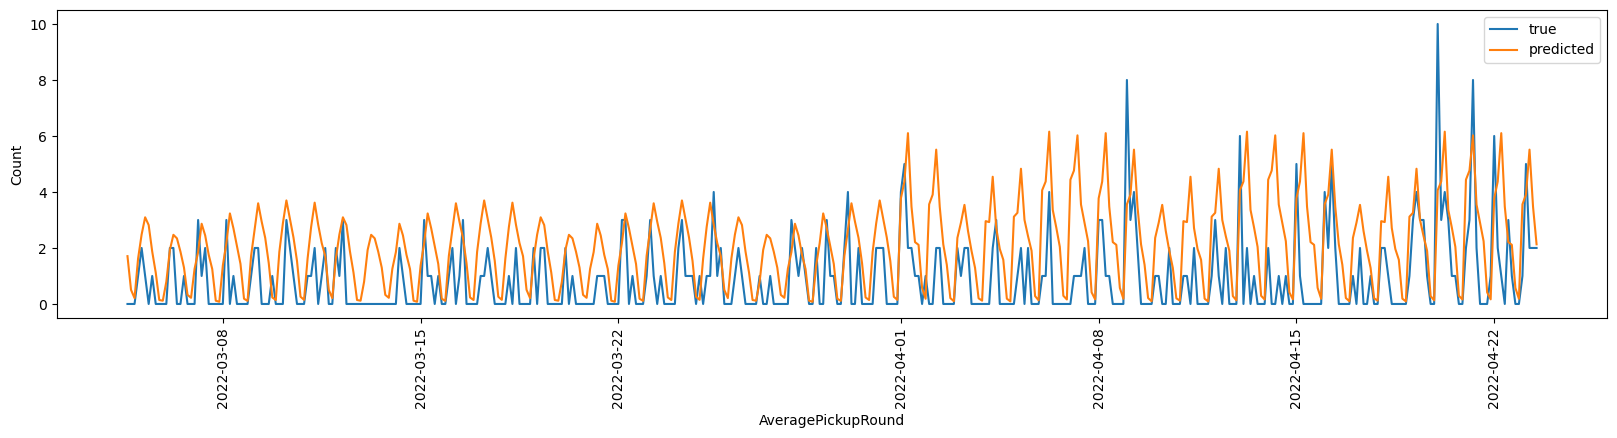

In [36]:
# plot true vs predicted for the BaselineAutoGluon model and a selected small subset of data
plt.figure(figsize=(20,4))
sns.lineplot(data=prediction_data.query('PickupCity=="Ljubljana" and DropoffCity=="Benetke" and model=="BaselineAutoGluon"').sort_values('AveragePickupRound')[500:900], x="AveragePickupRound", y="Count", label='true')
sns.lineplot(data=prediction_data.query('PickupCity=="Ljubljana" and DropoffCity=="Benetke" and model=="BaselineAutoGluon"').sort_values('AveragePickupRound')[500:900], x="AveragePickupRound", y="predictions", label='predicted')
plt.legend()
plt.xticks(rotation=90)

(array([19059., 19066., 19073., 19083., 19090., 19097., 19104.]),
 [Text(19059.0, 0, '2022-03-08'),
  Text(19066.0, 0, '2022-03-15'),
  Text(19073.0, 0, '2022-03-22'),
  Text(19083.0, 0, '2022-04-01'),
  Text(19090.0, 0, '2022-04-08'),
  Text(19097.0, 0, '2022-04-15'),
  Text(19104.0, 0, '2022-04-22')])

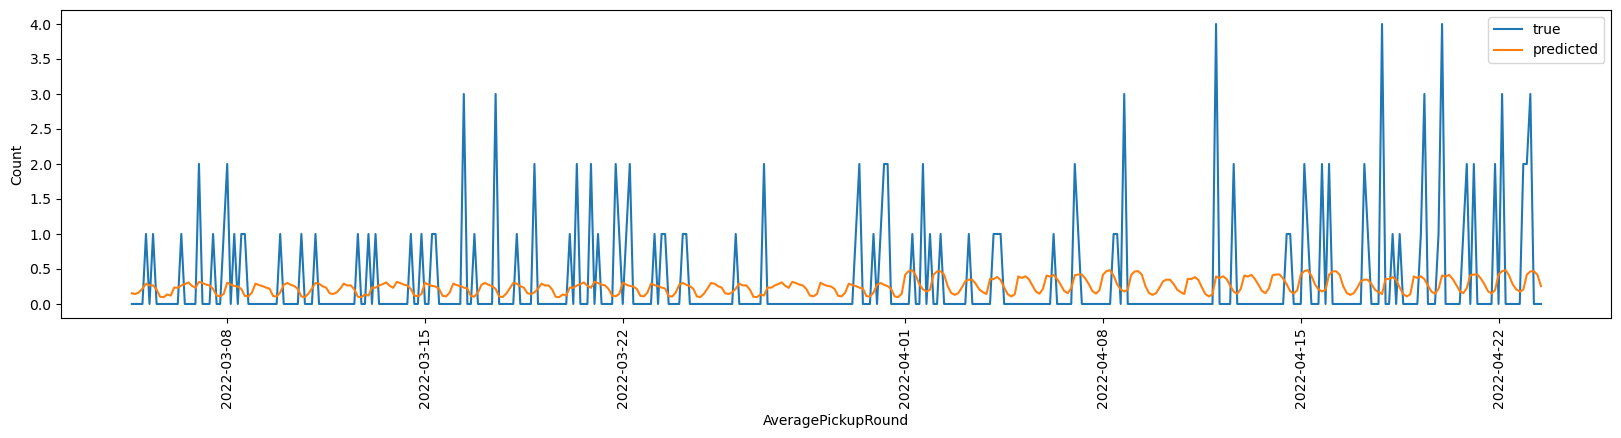

In [39]:
plt.figure(figsize=(20,4))
sns.lineplot(data=prediction_data.query('PickupCity=="Ljubljana" and DropoffCity=="Dunaj" and model=="BaselineAutoGluon"').sort_values('AveragePickupRound')[500:900], x="AveragePickupRound", y="Count", label='true')
sns.lineplot(data=prediction_data.query('PickupCity=="Ljubljana" and DropoffCity=="Dunaj" and model=="BaselineAutoGluon"').sort_values('AveragePickupRound')[500:900], x="AveragePickupRound", y="predictions", label='predicted')
plt.legend()
plt.xticks(rotation=90)

In [46]:
v = prediction_data.query('PickupCity=="Ljubljana" and DropoffCity=="Dunaj" and model=="BaselineAutoGluon"').sort_values('AveragePickupRound')[500:900]
v['neki'] = v['AveragePickupRound'].dt.day_name()
v.head(20)

predictions  Count              model PickupCity DropoffCity  \
54026     0.152743      0  BaselineAutoGluon  Ljubljana       Dunaj   
54028     0.142776      0  BaselineAutoGluon  Ljubljana       Dunaj   
54030     0.165175      0  BaselineAutoGluon  Ljubljana       Dunaj   
54033     0.218782      0  BaselineAutoGluon  Ljubljana       Dunaj   
54038     0.290168      1  BaselineAutoGluon  Ljubljana       Dunaj   
54040     0.265427      0  BaselineAutoGluon  Ljubljana       Dunaj   
54043     0.265669      1  BaselineAutoGluon  Ljubljana       Dunaj   
54045     0.207601      0  BaselineAutoGluon  Ljubljana       Dunaj   
54050     0.103032      0  BaselineAutoGluon  Ljubljana       Dunaj   
54053     0.097031      0  BaselineAutoGluon  Ljubljana       Dunaj   
54056     0.135541      0  BaselineAutoGluon  Ljubljana       Dunaj   
54058     0.120200      0  BaselineAutoGluon  Ljubljana       Dunaj   
54060     0.234669      0  BaselineAutoGluon  Ljubljana       Dunaj   
54063     0.231983      0  BaselineAutoGluon  Ljubljana       Dunaj   
54066     0.263918      1  BaselineAutoGluon  Ljubljana       Dunaj   
54070     0.282797      0  BaselineAutoGluon  Ljubljana       Dunaj   
54073     0.308540      0  BaselineAutoGluon  Ljubljana       Dunaj   
54075     0.260312      0  BaselineAutoGluon  Ljubljana       Dunaj   
54080     0.230625      0  BaselineAutoGluon  Ljubljana       Dunaj   
54083     0.316091      2  BaselineAutoGluon  Ljubljana       Dunaj   

       AveragePickupRound      neki  
54026 2022-03-04 15:00:00    Friday  
54028 2022-03-04 18:00:00    Friday  
54030 2022-03-04 21:00:00    Friday  
54033 2022-03-05 00:00:00  Saturday  
54038 2022-03-05 03:00:00  Saturday  
54040 2022-03-05 06:00:00  Saturday  
54043 2022-03-05 09:00:00  Saturday  
54045 2022-03-05 12:00:00  Saturday  
54050 2022-03-05 15:00:00  Saturday  
54053 2022-03-05 18:00:00  Saturday  
54056 2022-03-05 21:00:00  Saturday  
54058 2022-03-06 00:00:00    Sunday  
54060 2022-03-06 03:00:00    Sunday  
54063 2022-03-06 06:00:00    Sunday  
54066 2022-03-06 09:00:00    Sunday  
54070 2022-03-06 12:00:00    Sunday  
54073 2022-03-06 15:00:00    Sunday  
54075 2022-03-06 18:00:00    Sunday  
54080 2022-03-06 21:00:00    Sunday  
54083 2022-03-07 00:00:00    Monday